In [4]:
from keras.utils import image_dataset_from_directory
import numpy as np
from matplotlib import pyplot as plt
import pathlib
import random
import keras 
import tensorflow as tf
from keras import layers
import PIL
import cv2
import os

# Reading and preparing the dataset

In [5]:
encoding_dim=32
batch_size = 32
img_height = 256
img_width = 256
channels=3
img_shape=(img_height,img_width,channels)

300 40 3


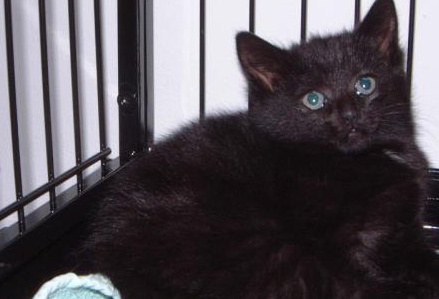

In [6]:
train='./Cats/train/'
test='./Cats/test/'
custom_images='./custom/'
test_path=pathlib.Path(test)
train_path=pathlib.Path(train)
custom_path=pathlib.Path(custom_images)
custom_imgs=len(list(custom_path.glob('**/*.jpg')))
image_train = len(list(train_path.glob('*/*.jpg')))
image_test = len(list(test_path.glob('*/*.jpg')))
print(image_train,image_test,custom_imgs)
# list dirs of images to preprocess on them
cats_train = list(train_path.glob('*/*'))
cats_test = list(test_path.glob('*/*'))
imgs_custom= list(custom_path.glob('**/*.jpg'))
PIL.Image.open(str(cats_train[0]))

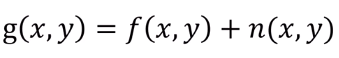
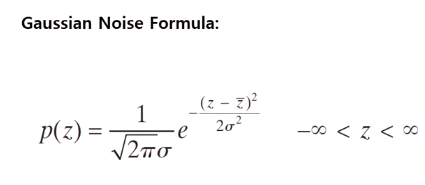

In [7]:
def prepare_data(list_of_img_dirs,img_shape):
    mean=0
    variance=0.01
    sigma=np.sqrt(variance)
    n=np.random.normal(loc=mean,scale=sigma,size=img_shape)
    plt.axis(False)
    plt.imshow(n,cmap='gray')    
    imgs_array_g=[]
    imgs_array=[]
    
    for img_dir in list_of_img_dirs:
        img = cv2.imread(str(img_dir))
        im=cv2.resize(img,img_shape[:2])
        im=im/255.0
        imgs_array.append(im)
        g=im+n
        imgs_array_g.append(g)
    return np.array(imgs_array),np.array(imgs_array_g)

def plot_real_decoded(real_imgs,decoded_imgs,n=10):
    # n=10
    plt.figure(figsize=(15,15))
    for i in range(1,n+1):
        # Display original
        ax = plt.subplot(2, n, i)
        plt.imshow(real_imgs[i].reshape(256, 256,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + n)
        plt.imshow(decoded_imgs[i].reshape(256, 256,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


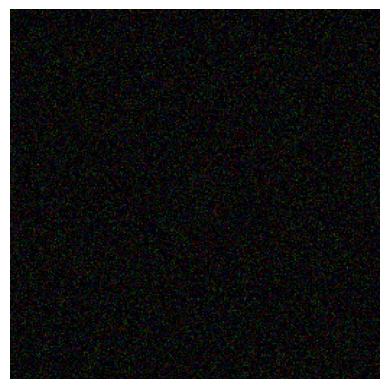

In [9]:
imgs_train,imgs_train_g=prepare_data(cats_train,img_shape)
imgs_test,imgs_test_g=prepare_data(cats_test,img_shape)
imgs_custom,imgs_custom_g=prepare_data(imgs_custom,img_shape)

In [10]:
print('images for training shape',imgs_train.shape)
print('images for testing shape',imgs_test.shape)
print('images for custom shape',imgs_custom.shape)

images for training shape (300, 256, 256, 3)
images for testing shape (40, 256, 256, 3)
images for custom shape (3, 256, 256, 3)


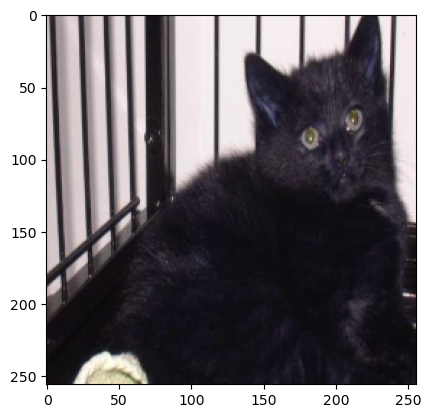

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


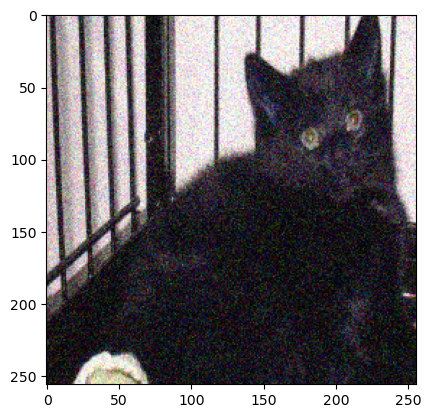

In [11]:
plt.imshow(imgs_train[0])
plt.show()
plt.imshow(imgs_train_g[0])
plt.show()

# Autoencoders Archs

```
Bulid First autoencoder "32x32x1"
```

In [24]:
input_img_1 = keras.Input(shape=img_shape)
x_1 = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img_1)
#256x256x16
x_1 = layers.MaxPooling2D((2, 2), padding='same')(x_1)
#128x128x16
x_1= layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x_1)
#128x128x8
x_1= layers.MaxPooling2D((2, 2), padding='same')(x_1)
#64x64x8
x_1 = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x_1)
#64x64x1
encoded_1 = layers.MaxPooling2D((2, 2), padding='same')(x_1)
#32x32x1

x_1 = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(encoded_1)
# 32x32x8
x_1 = layers.UpSampling2D((2, 2))(x_1)
#64x64x8
x_1 = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x_1)
#64x64x8
x_1 = layers.UpSampling2D((2, 2))(x_1)
#128*128*8
x_1 = layers.Conv2D(16, (3, 3), activation='relu',padding='same')(x_1)
# 128*128*16
x_1 = layers.UpSampling2D((2, 2))(x_1)
# 256*256*15
decoded_1 = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x_1)
# 256*256*3

In [25]:
autoencoder_1 = keras.Model(input_img_1, decoded_1)
autoencoder_1.compile(optimizer='adam', loss='MAE')
autoencoder_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 8)       1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 1)         73  

In [26]:
autoencoder_1.fit(imgs_train_g, imgs_train,
                epochs=100,
                batch_size=16,
                shuffle=True,
                )

2022-12-15 19:07:21.336948: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 235929600 exceeds 10% of free system memory.


Epoch 1/100


2022-12-15 19:07:21.637269: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 235929600 exceeds 10% of free system memory.


19/19 [==============================] - 13s 641ms/step - loss: 0.2311
Epoch 2/100
19/19 [==============================] - 12s 645ms/step - loss: 0.2165
Epoch 3/100
19/19 [==============================] - 12s 652ms/step - loss: 0.1849
Epoch 4/100
19/19 [==============================] - 13s 672ms/step - loss: 0.1426
Epoch 5/100
19/19 [==============================] - 13s 674ms/step - loss: 0.1253
Epoch 6/100
19/19 [==============================] - 14s 699ms/step - loss: 0.1108
Epoch 7/100
19/19 [==============================] - 13s 678ms/step - loss: 0.0968
Epoch 8/100
19/19 [==============================] - 13s 676ms/step - loss: 0.0875
Epoch 9/100
19/19 [==============================] - 13s 685ms/step - loss: 0.0819
Epoch 10/100
19/19 [==============================] - 13s 675ms/step - loss: 0.0799
Epoch 11/100
19/19 [==============================] - 12s 654ms/step - loss: 0.0774
Epoch 12/100
19/19 [==============================] - 13s 670ms/step - loss: 0.0758
Epoch 13/100


In [ ]:
autoencoder_1.save('autoencoder1_32.h5')

In [ ]:
from keras.models import load_model
trained_autoencoder_1 = load_model('autoencoder1_32.h5')
trained_autoencoder_1.fit(imgs_train_g, imgs_train,
                epochs=300,
                batch_size=16,
                shuffle=True,
                )

Epoch 1/300
19/19 [==============================] - 12s 607ms/step - loss: 0.0597
Epoch 2/300
19/19 [==============================] - 15s 711ms/step - loss: 0.0596
Epoch 3/300
19/19 [==============================] - 12s 607ms/step - loss: 0.0594
Epoch 4/300
19/19 [==============================] - 12s 610ms/step - loss: 0.0591
Epoch 5/300
19/19 [==============================] - 12s 611ms/step - loss: 0.0591
Epoch 6/300
19/19 [==============================] - 11s 603ms/step - loss: 0.0597
Epoch 7/300
19/19 [==============================] - 11s 602ms/step - loss: 0.0589
Epoch 8/300
19/19 [==============================] - 12s 617ms/step - loss: 0.0592
Epoch 9/300
19/19 [==============================] - 12s 613ms/step - loss: 0.0590
Epoch 10/300
19/19 [==============================] - 12s 607ms/step - loss: 0.0591
Epoch 11/300
19/19 [==============================] - 11s 601ms/step - loss: 0.0594
Epoch 12/300
19/19 [==============================] - 12s 613ms/step - loss: 0.0594
E

In [12]:
from keras.models import load_model
trained_autoencoder_1 = load_model('autoencoder1_32.h5')

In [ ]:
# trained_autoencoder_1.save('autoencoder1_32.h5')

In [13]:
decoded_imgs_1 = trained_autoencoder_1.predict(imgs_test_g)
decoded_custom_imgs_1=trained_autoencoder_1.predict(imgs_custom_g)

2022-12-15 19:01:53.566003: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.


1/2 [==============>...............] - ETA: 0s

2022-12-15 19:01:53.792078: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.


1/1 [==============================] - 0s 54ms/step


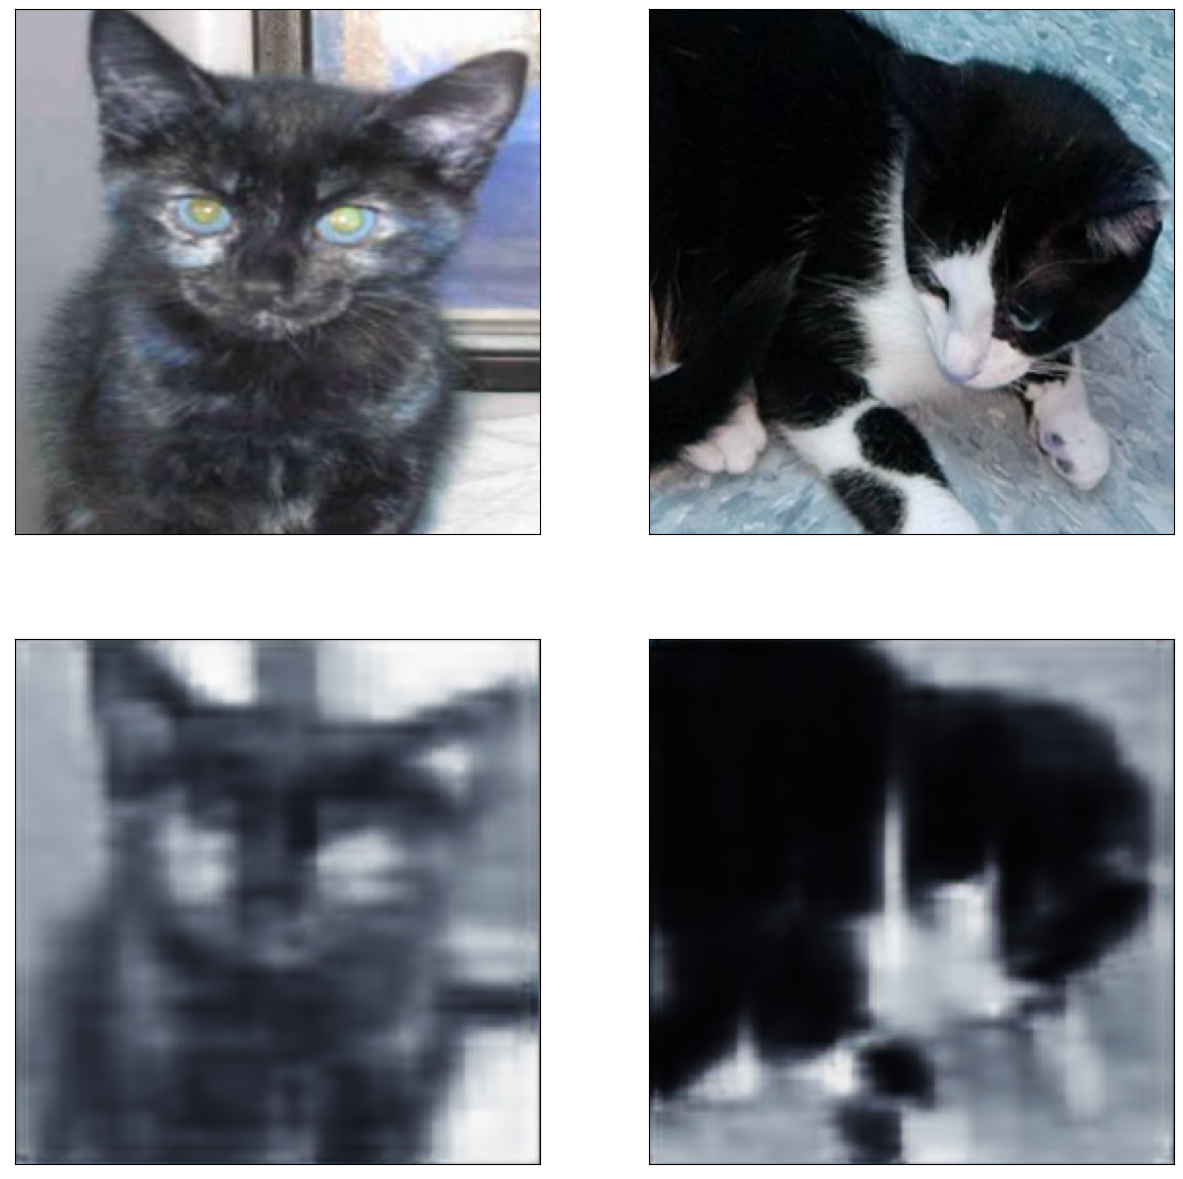

In [14]:
plot_real_decoded(imgs_test,decoded_imgs_1,n=2)

In [ ]:
plot_real_decoded(imgs_custom,decoded_custom_imgs_1,n=2)

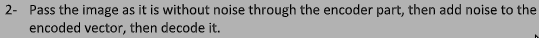

## Split the encoder and decoder part


In [21]:
trained_autoencoder_1.layers[0]

In [20]:
#Encoder
encoder1 = keras.Model(input_img_1, encoded_1)
#pass origin images to encoder part  without the noise
encoded_vectors_1=encoder1.predict(imgs_test)
custom_encoded_imgs = encoder.predict(imgs_test)
###Decoder
encoder_vector_shape=encoded_vectors_1.shape[1:]

input_img_d = keras.Input(shape=encoder_vector_shape)
x_d = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(input_img_d)
# 32x32x8
x_d = layers.UpSampling2D((2, 2))(x_d)
#64x64x8
x_d = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x_d)
#64x64x8
x_d = layers.UpSampling2D((2, 2))(x_d)
#128*128*8
x_d = layers.Conv2D(16, (3, 3), activation='relu',padding='same')(x_d)
# 128*128*16
x_d = layers.UpSampling2D((2, 2))(x_d)
# 256*256*16
decoded_d = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x_d)
decoder1=keras.Model(input_img_d, decoded_d)
k=0
for i in range(7,14):
    decoder1.weights[k].assign(trained_autoencoder_1.weights[i])

ValueError: Found unexpected instance while processing input tensors for keras functional model. Expecting KerasTensor which is from tf.keras.Input() or output from keras layer call(). Got: <keras.engine.input_layer.InputLayer object at 0x7f1308787280>

In [ ]:
def add_noise(encoded_imgs):
    img_size=encoded_imgs.shape[1:]
    mean=0
    variance=0.01
    sigma=np.sqrt(variance)
    n=np.random.normal(loc=mean,scale=sigma,size=img_size)
    plt.axis(False)
    plt.imshow(n,cmap='gray')
    plt.title("Noise Shape")
    encoded_imgs_g=[]
    for encoded_img in encoded_imgs:   
        img=encoded_img/encoded_img.max()
        g=img+n
        encoded_imgs_g.append(g)
    return np.array(encoded_imgs_g)

In [ ]:
#Add Noise to the encoded vector
encoded_vectors_1_g=add_noise(encoded_vectors_1)
custom_encoded_imgs_g=add_noise(custom_encoded_imgs)
print(encoded_vectors_1_g.shape)
print(custom_encoded_imgs_g.shape)

In [ ]:
n = 10
plt.figure(figsize=(20, 8))
print("Encoded Images")
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_vectors_1[i,:,:,0].reshape((32, 32)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
n = 10
plt.figure(figsize=(20, 8))
print("Encoded Images + Noise")
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)    
    plt.imshow(encoded_vectors_1_g[i,:,:,0].reshape((32, 32)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
decoded_imgs_1_d = decoder1.predict(encoded_vectors_1_g)
decoded_custom_1_d = decoder1.predict(custom_encoded_imgs_g)
decoded_imgs_1_d.shape

In [ ]:
plot_real_decoded(imgs_test,decoded_imgs_1_d,n=5)

## custom Dataset

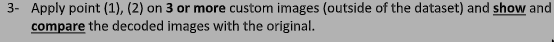

In [ ]:
plot_real_decoded(imgs_custom,decoded_custom_1,n=2)

In [104]:
input_img_ = keras.Input(shape=img_shape)

x_ = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img_)
#256x256x32
x_ = layers.MaxPooling2D((2, 2), padding='same')(x_)
#128x128x32
x_ = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x_)
#128x128x16
x_ = layers.MaxPooling2D((2, 2), padding='same')(x_)
#64x64x16
x_ = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x_)
#64x64x8
x_ = layers.MaxPooling2D((2, 2), padding='same')(x_)
#32x32x8
x_ = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x_)
#32x32x1
encoded_ = layers.MaxPooling2D((2, 2), padding='same')(x_)
#16x16x1

x_ = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(encoded_)
#16x16x1
x_ = layers.UpSampling2D((2, 2))(x_)
#32x32x1
x_ = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x_)
#32x32x8
x_ = layers.UpSampling2D((2, 2))(x_)
#64x64x8
x_ = layers.Conv2D(16, (3, 3), activation='relu',padding='same')(x_)
#64x64x16
x_ = layers.UpSampling2D((2, 2))(x_)
# 128x128x16
x_ = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x_)
# 128x128x32
# 256*256*1
decoded_ = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x_)
# 256*256*3
autoencoder2= keras.Model(input_img_, decoded_)
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_57 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 128, 128, 16)      4624      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 64, 64, 8)         1160